# Exercise 2.3

In [29]:
import matplotlib.pyplot as plt
import mlb as mlb
import numpy as np

## General setup

In [30]:
rng = np.random.default_rng(3317)
plt.style.use("ggplot")

## Parameters for experiment

In [31]:
n = 1000
delta = 0.01

p_hats = np.linspace(0.0, 1.0, 1001)  # e.g. 0, 0.001, … ,1

In [32]:
bounds = np.array([mlb.kl_upper_bound(ph, n, delta) for ph in p_hats])


# ----
# Hoeffding error term  \epsilon = sqrt( ln(1/δ) / (2n) )
epsilon = np.sqrt(np.log(1.0 / delta) / (2.0 * n))

# Upper‐bound on the true bias  p  (may exceed 1 slightly; clip at 1 for display)
upper_bound = np.clip(p_hats + epsilon, 0.0, 1.0)
# ---


## Plot

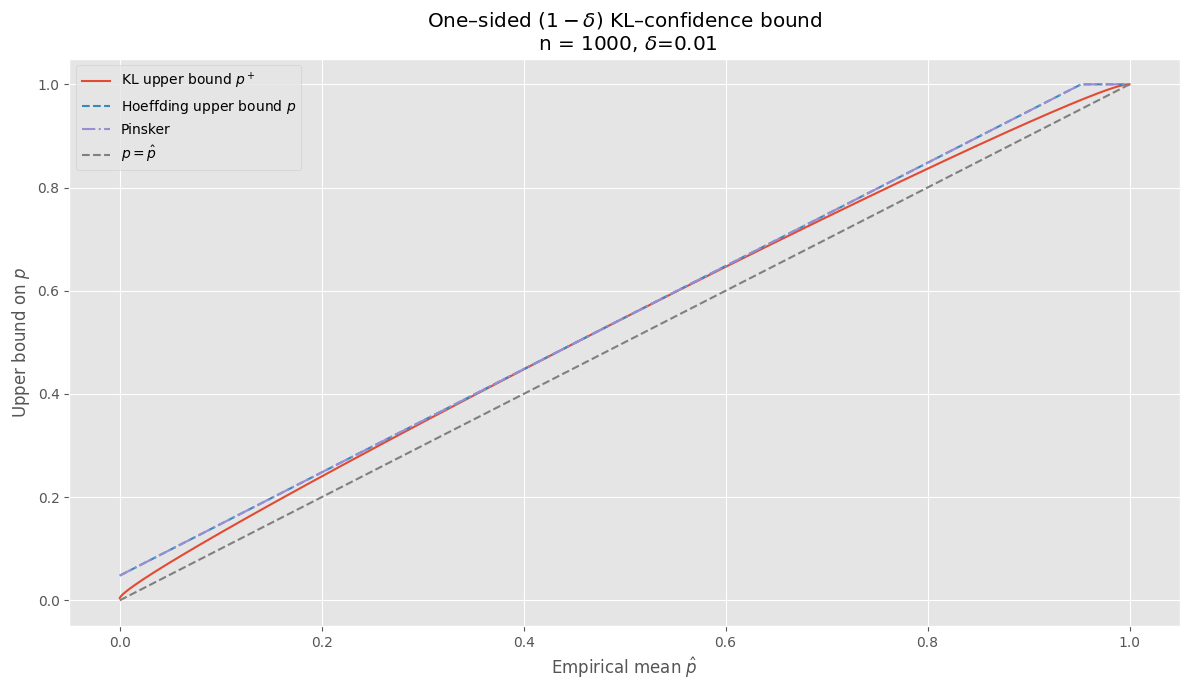

In [33]:
plt.figure(figsize=(12, 7))
plt.plot(p_hats, bounds, label=r"KL upper bound $p^+$")
plt.plot(p_hats, upper_bound, "--", label=r"Hoeffding upper bound $p$")
plt.plot(p_hats, upper_bound, "-.", label=r"Pinsker")
plt.plot(p_hats, p_hats, "--", color="gray", label=r"$p = \hat p$")
plt.xlabel(r"Empirical mean $\hat p$")
plt.ylabel(r"Upper bound on $p$")
plt.title(
    r"One–sided $(1-\delta)$ KL–confidence bound"
    f"\n n = {n}, " + r"$\delta$" + f"={delta}"
)
plt.legend()
# plt.grid(True, ls=":")
plt.tight_layout()
plt.show()


In [34]:
p_hats = p_hats[:101]
bounds = bounds[:101]
upper_bound = upper_bound[:101]

## Zoomed plot

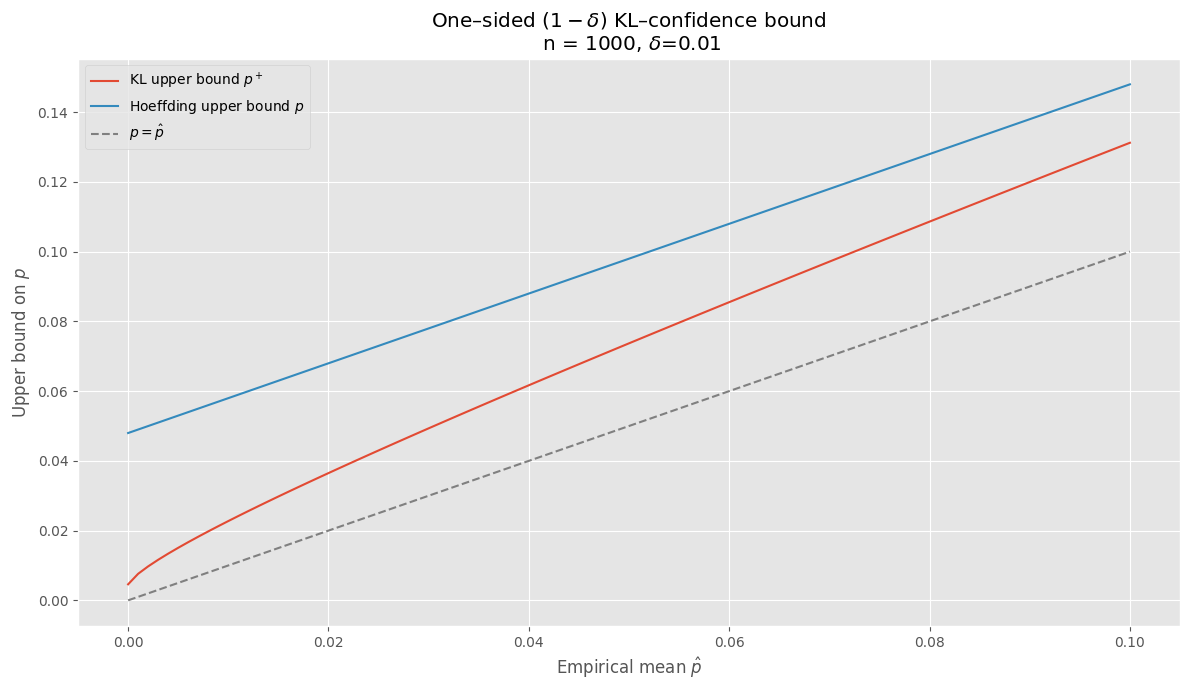

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(p_hats, bounds, label=r"KL upper bound $p^+$")
plt.plot(p_hats, upper_bound, label=r"Hoeffding upper bound $p$")
plt.plot(p_hats, p_hats, "--", color="gray", label=r"$p = \hat p$")
plt.xlabel(r"Empirical mean $\hat p$")
plt.ylabel(r"Upper bound on $p$")
plt.title(
    r"One–sided $(1-\delta)$ KL–confidence bound"
    f"\n n = {n}, " + r"$\delta$" + f"={delta}"
)
plt.legend()
plt.tight_layout()
plt.show()

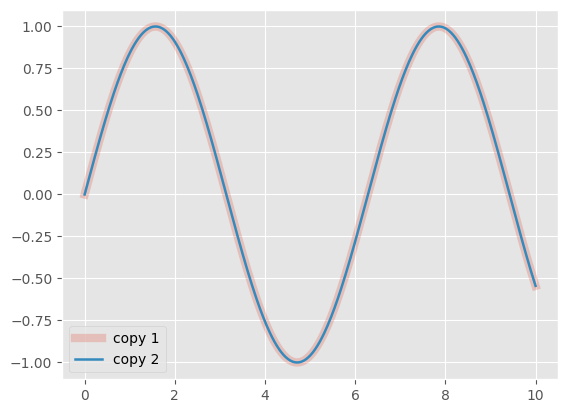

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 400)
y = np.sin(x)  # the “two identical” functions

plt.plot(
    x,
    y,  # 1st copy
    lw=6,  # make it wide
    color="C0",  # any colour you like
    alpha=0.25,  # <-- transparency
    label="copy 1",
)

plt.plot(
    x,
    y,  # 2nd copy
    lw=1.8,  # normal width
    color="C1",  # different colour
    label="copy 2",
)

plt.legend()
plt.show()

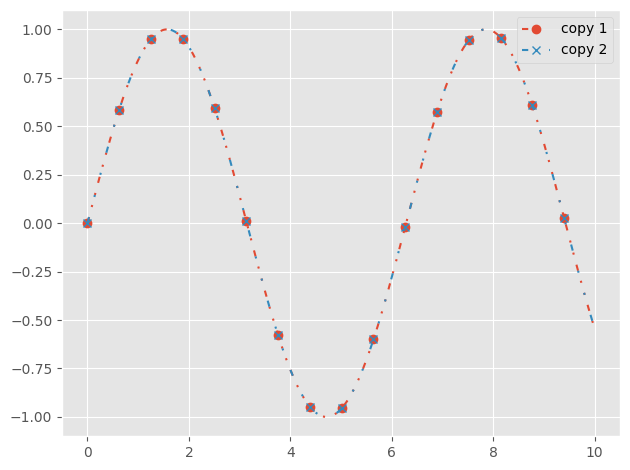

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Some data: two copies of exactly the same function
x = np.linspace(0, 10, 400)
y = np.sin(x)

# 1st copy  ─ solid line with circle markers
plt.plot(
    x,
    y,
    color="C0",
    linestyle=(0, (3, 5, 1, 5, 1, 5)),
    marker="o",  # ◯ markers
    markevery=25,  # show marker every 25th point
    label="copy 1",
)

# 2nd copy  ─ solid line with x markers
plt.plot(
    x,
    y,
    color="C1",
    linestyle=(0, (3, 10, 1, 10, 1, 10)),
    marker="x",  # ✕ markers
    markevery=25,  # same spacing
    label="copy 2",
)

plt.legend()
plt.tight_layout()
plt.show()